In [94]:
#COM 404 PROJECT
#KIPLIMO VICTOR
#P101/1365G/20

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils.multiclass import unique_labels
import itertools
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

data = pd.read_csv('breastcancer.csv')

In [95]:
#this is where I downloaded the dataset 
#https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/download?datasetVersionNumber=2

In [74]:
#Display the data frame information
import pandas as pd
 
# Creating the dataframe 
df = pd.read_csv("breastcancer.csv")
 
# Display the dataframe information
print("\nDataFrame Information:")
print(df.info())

# Display the number of rows and columns
print("\nNumber of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  pe

In [75]:
#Display the first and last tuples of the data set
df.head()
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [76]:
# Display the descriptive statistics of the dataframe
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.0140

In [81]:
#Display the class label distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

# Breast cancer dataset for classification
data = load_breast_cancer()
print (data.feature_names)
print (data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


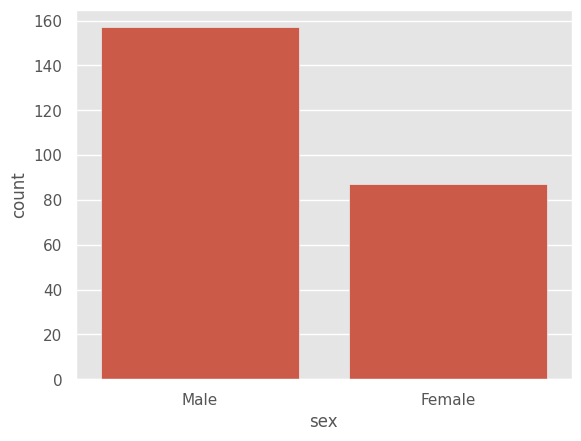

In [83]:
#Use seaborn to display count plot for the class label
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a tips.csv file from seaborn library
df = sns.load_dataset('tips')
 
# count plot on single categorical variable
sns.countplot(x ='sex', data = df)
 
# Show the plot
plt.show()


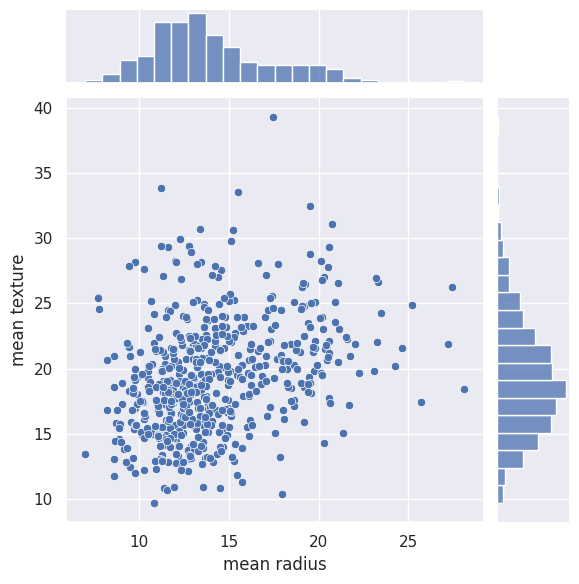

In [89]:
#Use seaborn to display a joint plot with any two variables of your choice.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
data = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']],
                     columns= list(cancer['feature_names']) + ['target'])
sns.jointplot(data=data, x="mean radius", y="mean texture", kind="scatter")
plt.show()

In [90]:
#Determine based in the data set, whether you want to use category encoders
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [58]:
#Split the data such that 25% is reserved testing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the data into training and testing sets
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
# Check the shape of the training set and the test set
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1) # features
y = data['target'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)

Training set shape:  (426, 30)
Test set shape:  (143, 30)


Accuracy: 0.965034965034965
Confusion Matrix:
[[50  4]
 [ 1 88]]


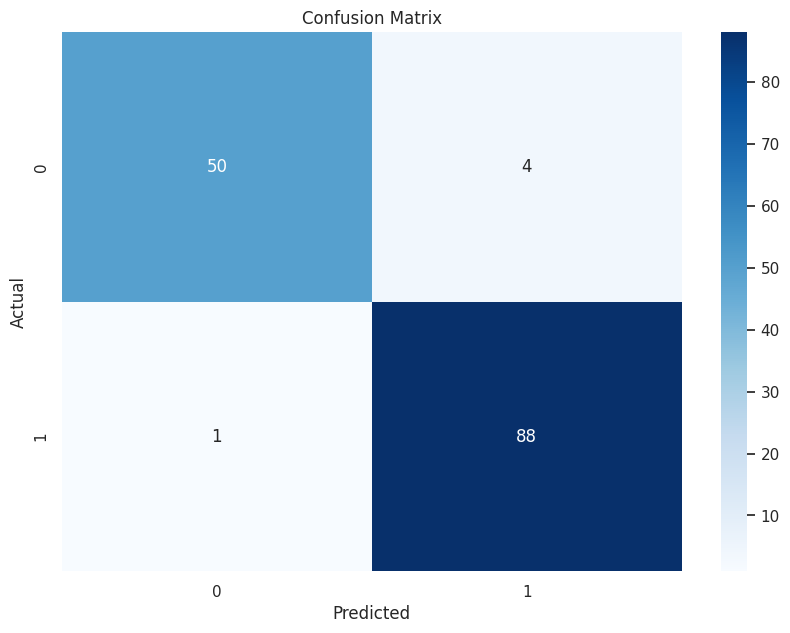

Full Dataset Accuracy: 0.9472759226713533


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train a K-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the test set results
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Train the model on the whole dataset and predict
knn_full = KNeighborsClassifier(n_neighbors=5)
knn_full.fit(X, y)
y_pred_full = knn_full.predict(X)

# Calculate the accuracy for the full dataset
accuracy_full = accuracy_score(y, y_pred_full)
print("Full Dataset Accuracy:", accuracy_full)

In [61]:
# Calculate the accuracy for the training set
accuracy_train = accuracy_score(y_train, knn.predict(X_train))
print("Training Dataset Accuracy:", accuracy_train)

# Calculate the accuracy for the test set
accuracy_test = accuracy_score(y_test, y_pred)
print("Test Dataset Accuracy:", accuracy_test)

Training Dataset Accuracy: 0.9342723004694836
Test Dataset Accuracy: 0.965034965034965


Accuracy: 0.956140350877193


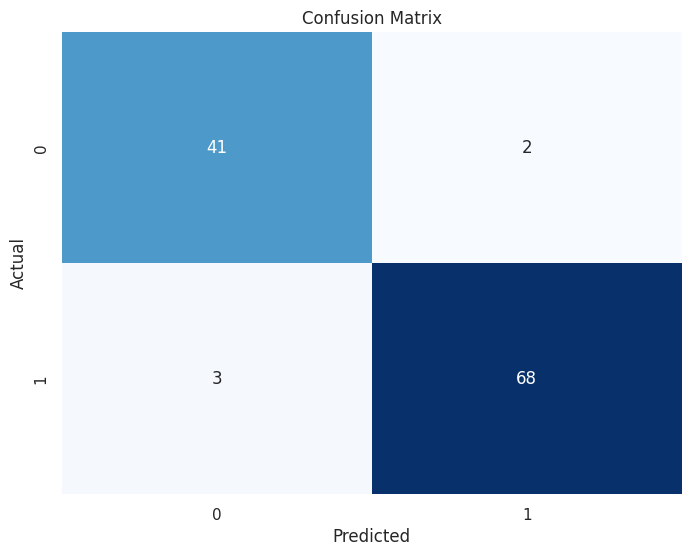

Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.956140350877193


In [65]:
#Train a model using SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is the feature set and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict on the training data
y_train_pred = svm.predict(X_train)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {accuracy}")

Accuracy: 0.9385964912280702


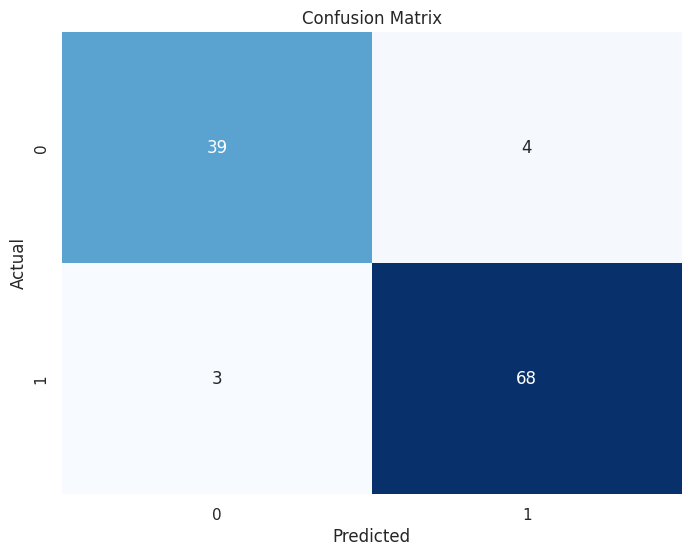

Training Accuracy: 1.0
Testing Accuracy: 0.9385964912280702


In [66]:
#To train a model using a Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is the feature set and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict on the training data
y_train_pred = dt.predict(X_train)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {accuracy}")

[[40  3]
 [ 1 70]]


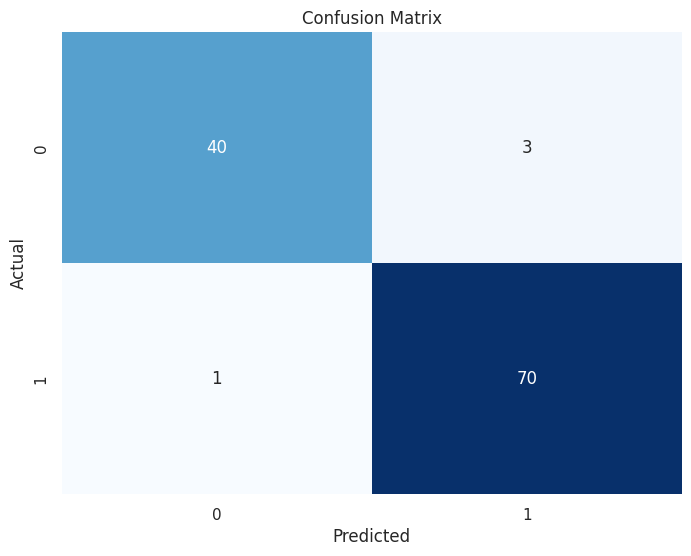

Accuracy: 0.9649122807017544
Training Accuracy: 1.0
Testing Accuracy: 0.9649122807017544


In [67]:
#Train a model using Random Forest
#Show the confusion matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Show the heat map
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Show the classification accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#Compare the training and testing accuracy
# Predict on the training data
y_train_pred = rf.predict(X_train)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {accuracy}")

In [68]:
#Demonstrate by way of a plot, which ml algorithm performs better from your results above.

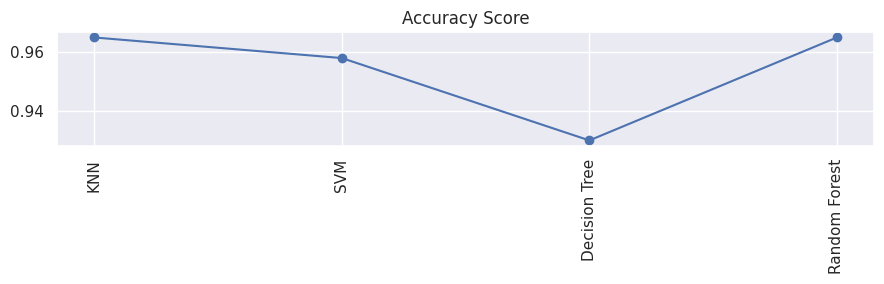

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Training models
models = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel='linear', C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

names = ['KNN', 'SVM', 'Decision Tree', 'Random Forest']
scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Plotting results
plt.figure(figsize=(9, 3))
plt.plot(names, scores, 'o-')
plt.title('Accuracy Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [93]:
#kiplimo Victor 
#P101/1365G/20